In [1]:
import numpy as np
import getdist
from getdist import plots
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy
import sys

import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)

sys.path.append(os.path.join(os.path.dirname("__file__"), '../'))
from metrics import diff
from metrics import flow
from metrics import tension
from metrics.parameter_metrics import *
from metrics import utilities

%matplotlib inline

2023-11-21 12:21:34.193624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-21 12:21:34.324170: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-21 12:21:34.339581: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.0/lib64:/usr/local/cuda/lib64:
2023-11-21 12:21:34.339596: I tensorflow/strea

In [2]:
### Settings
n_dim = 2
n_points = 50000
shifts = [0,1,2,3,4,5]

In [3]:
chain_arr = []
cov = np.diag(np.ones(n_dim))
for shift in shifts:
    mean = np.zeros(n_dim)
    mean[0] = shift
    points = np.random.multivariate_normal(mean,cov,n_points)
    chain = getdist.mcsamples.MCSamples(samples=points,names=['A','B'], labels=['A','B'],label=f'Chain {shift}')
    chain_arr.append(chain)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


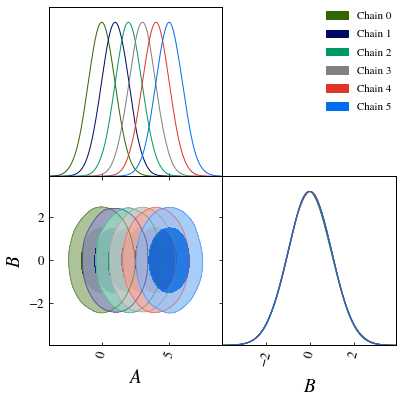

In [4]:
# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 'medium'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'pdf'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['legend.fontsize'] = 14

analysissettings3={
  'smooth_scale_1D':0.3,
  'smooth_scale_2D':0.3,
  'ignore_rows': u'0.0',
  'range_confidence' : u'0.005'
}

g = plots.get_subplot_plotter()
#GET DIST PLOT SETUP
g = plots.get_subplot_plotter(analysis_settings=analysissettings3,width_inch=6,rc_sizes=True)
g.legend_fontsize=12
g.settings.axis_tick_x_rotation=75
g.settings.lw_contour = 1.2
g.settings.legend_rect_border = False
g.settings.figure_legend_frame = False
g.settings.axes_fontsize = 14.0
g.settings.legend_fontsize = 12
g.settings.alpha_filled_add = 0.85
g.settings.lab_fontsize=20
g.legend_labels=False
g.triangle_plot(chain_arr,
               filled=True,
               contour_ls='solid', 
               contour_lws=1,
               labels=['0'])
g.export('2d_gaussian_test.pdf')

In [5]:
#### OTHER METRICS?
chain_arr = []
cov = np.diag(np.ones(n_dim))
for shift in shifts:
    mean = np.zeros(n_dim)
    mean[0] = shift
    points = np.random.multivariate_normal(mean,cov,n_points)
    chain = getdist.mcsamples.MCSamples(samples=points,names=['A','B'], labels=['A','B'])
    chain_arr.append(chain)
    
new_chain_arr = []
cov = np.diag(np.ones(n_dim)/30)
new_shifts = [1,2,3,4,5]
for shift in new_shifts:
    mean = np.zeros(n_dim)
    mean[0] = shift
    points = np.random.multivariate_normal(mean,cov,n_points)
    chain = getdist.mcsamples.MCSamples(samples=points,names=['A','B'], labels=['A','B'])
    new_chain_arr.append(chain)
    
chain0 = chain_arr[0]

#GAUSSIAN
fid_a = chain0.getParams().A
fid_b = chain0.getParams().B
fid_means  = np.mean([fid_a,fid_b],axis=1)
names = ['A','B']
fid_cov  = chain0.cov(names)

for i,chain in enumerate(new_chain_arr):
    nsigma = qudm(chain0,chain,feedback=False)
    
    a = chain.getParams().A
    b = chain.getParams().B
    means = np.mean([a,b],axis=1)
    cov = chain.cov(names)
    print(np.linalg.det(cov)/np.linalg.det(fid_cov))
    chi2 = (means-fid_means) @ np.linalg.inv(cov + fid_cov) @ (means-fid_means)
    pte = scipy.stats.chi2.cdf(chi2, 2)
    t = np.sqrt(2)*scipy.special.erfinv(pte)
    
    print('Gaussian = {}'.format(t))
    print('   Q_UDM = {}'.format(nsigma))

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
0.0010951018072496428
Gaussian = 0.5104987429556471
   Q_UDM = 0.5401622720326261
0.0010892608681822807
Gaussian = 1.4721191543504473
   Q_UDM = 1.5420441528186126
0.0011029493170904305
Gaussian = 2.502417936343589
   Q_UDM = 2.6093264849036224
0.0010979248385446273
Gaussian = 3.5352162654861674
   Q_UDM = 3.675235101394876
0.0010870834737476923
Gaussian = 4.561855996704223
   Q_UDM = 4.734894450710923


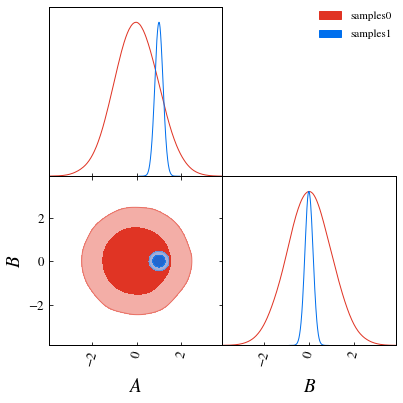

In [6]:
# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 'medium'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'pdf'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['legend.fontsize'] = 14

analysissettings3={
  'smooth_scale_1D':0.3,
  'smooth_scale_2D':0.3,
  'ignore_rows': u'0.0',
  'range_confidence' : u'0.005'
}

g = plots.get_subplot_plotter()
#GET DIST PLOT SETUP
g = plots.get_subplot_plotter(analysis_settings=analysissettings3,width_inch=6,rc_sizes=True)
g.legend_fontsize=12
g.settings.axis_tick_x_rotation=75
g.settings.lw_contour = 1.2
g.settings.legend_rect_border = False
g.settings.figure_legend_frame = False
g.settings.axes_fontsize = 14.0
g.settings.legend_fontsize = 12
g.settings.alpha_filled_add = 0.85
g.settings.lab_fontsize=20
g.legend_labels=False
g.triangle_plot([chain0,new_chain_arr[0]],
               filled=True,
               contour_ls='solid', 
               contour_lws=1,
               labels=['0'])
g.export('2d_gaussian_test.pdf')

In [7]:
#NF
results_nf=[]
fid_chain = chain_arr[0]
for i,chain in enumerate(chain_arr):
    if i==0:
        continue
    chains = diff.chain()
    chains.chains = [fid_chain,chain]     
    chains.diff(feedback=False) # compute the difference chain
    maf = flow.MAF(n_dim)
    maf.setup(feedback=False)
    maf.train(chains.diff_chain,batch_size=4096,feedback=False)
    nsigma,high,low = tension.flow_significance(
                        maf.target_dist,
                        maf.gauss_bijector,
                        n_dim
                        )
    results_nf.append(nsigma)
    print(nsigma)

2023-11-21 12:21:45.522453: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2023-11-21 12:21:45.522488: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: amypond
2023-11-21 12:21:45.522493: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: amypond
2023-11-21 12:21:45.522609: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.147.5
2023-11-21 12:21:45.522624: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 525.125.6
2023-11-21 12:21:45.522628: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 525.125.6 does not match DSO version 525.147.5 -- cannot find working devices in this configuration
2023-11-21 12:21:45.524148: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFl

[                    ] Training... (epoch 1/100)

KeyboardInterrupt: 

In [6]:
#GAUSSIAN
results_gauss=[]
fid_chain = chain_arr[0]

fid_a = fid_chain.getParams().A
fid_b = fid_chain.getParams().B
fid_means  = np.mean([fid_a,fid_b],axis=1)
names = ['A','B']
fid_cov  = fid_chain.cov(names)

for i,chain in enumerate(chain_arr):
    if i==0:
        continue
    a = chain.getParams().A
    b = chain.getParams().B
    means = np.mean([a,b],axis=1)
    cov = chain.cov(names)
    chi2 = (means-fid_means) @ np.linalg.inv(cov + fid_cov) @ (means-fid_means)
    pte = scipy.stats.chi2.cdf(chi2, 2)
    t = np.sqrt(2)*scipy.special.erfinv(pte)
    results_gauss.append(t)
    print('Gaussian Tension = {}'.format(t))
    
    

Gaussian Tension = 0.2796056245502778
Gaussian Tension = 0.9039288278556087
Gaussian Tension = 1.609824871899598
Gaussian Tension = 2.360836257104938
Gaussian Tension = 3.097466662362832


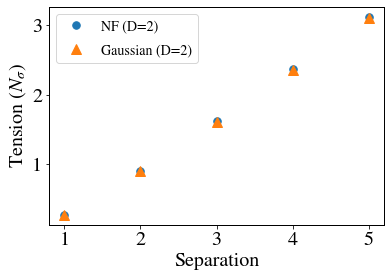

In [8]:
#### PLOT DATA ####
gaussian_tension_1 = 0.2796056245502778
gaussian_tension_2 = 0.9039288278556087
gaussian_tension_3 = 1.609824871899598
gaussian_tension_4 = 2.360836257104938
gaussian_tension_5 = 3.097466662362832
                             
nf_1 = 0.2802965466700351                             
nf_2 = 0.9018978922947325                             
nf_3 = 1.6286791804495582                             
nf_4 = 2.3712658982688573                             
nf_5 = 3.11791467684613

results_gauss_2d = [gaussian_tension_1,gaussian_tension_2,gaussian_tension_3,gaussian_tension_4,gaussian_tension_5]
results_nf_2d = [nf_1,nf_2,nf_3,nf_4,nf_5]

shifts_2d=[1,2,3,4,5]

# 2 dimensions:
plt.plot(shifts_2d,results_nf_2d,label='NF (D=2)',linewidth=0,marker='.',markersize=15)
plt.plot(shifts_2d,results_gauss_2d,label='Gaussian (D=2)',linewidth=0,marker='^',markersize=10)
plt.xlabel('Separation')
plt.ylabel(r'Tension ($N_\sigma$)')
plt.legend()
plt.savefig('tension_2d.pdf')
#plt.title('D=2')

In [29]:
### Settings
n_dim = 5
n_points = 50000
shifts = [0,1,2,3,4,5]

In [30]:
chain_arr = []
cov = np.diag(np.ones(n_dim))
for shift in shifts:
    mean = np.zeros(n_dim)
    mean[0] = shift
    points = np.random.multivariate_normal(mean,cov,n_points)
    chain = getdist.mcsamples.MCSamples(samples=points,names=['A','B','C','D','E'], labels=['A','B','C','D','E'],label=f'Chain {shift}')
    chain_arr.append(chain)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


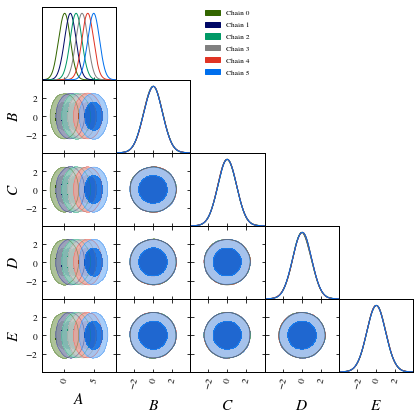

In [31]:
# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 'medium'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'pdf'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['legend.fontsize'] = 12

analysissettings3={
  'smooth_scale_1D':0.3,
  'smooth_scale_2D':0.3,
  'ignore_rows': u'0.0',
  'range_confidence' : u'0.005'
}

g = plots.get_subplot_plotter()
#GET DIST PLOT SETUP
g = plots.get_subplot_plotter(analysis_settings=analysissettings3,width_inch=6,rc_sizes=True)
g.legend_fontsize=12
g.settings.axis_tick_x_rotation=75
g.settings.lw_contour = 1.2
g.settings.legend_rect_border = False
g.settings.figure_legend_frame = False
g.settings.axes_fontsize = 14.0
g.settings.legend_fontsize = 12
g.settings.alpha_filled_add = 0.85
g.settings.lab_fontsize=20
g.legend_labels=False
g.triangle_plot(chain_arr,
               filled=True,
               contour_ls='solid', 
               contour_lws=1)
g.export('5d_gaussian.pdf')

In [11]:
#NF
results_nf=[]
fid_chain = chain_arr[0]
for i,chain in enumerate(chain_arr):
    if i==0:
        continue
    chains = diff.chain()
    chains.chains = [fid_chain,chain]     
    chains.diff(feedback=False) # compute the difference chain
    maf = flow.MAF(n_dim)
    maf.setup(feedback=False)
    maf.train(chains.diff_chain,batch_size=2048,feedback=False)
    nsigma,high,low = tension.flow_significance(
                        maf.target_dist,
                        maf.gauss_bijector,
                        n_dim
                        )
    results_nf.append(nsigma)
    print(nsigma)

[####################] Completed!                             
0.01629380472485912
[####################] Completed!                             
0.21555667090945932
[####################] Completed!                             
0.7037773703658002
[####################] Completed!                             
1.4210146517689244
[####################] Completed!                             
2.226211769317175


In [42]:
#GAUSSIAN
results_gauss=[]
fid_chain = chain_arr[0]

fid_a = fid_chain.getParams().A
fid_b = fid_chain.getParams().B
fid_c = fid_chain.getParams().C
fid_d = fid_chain.getParams().D
fid_e = fid_chain.getParams().E
fid_means  = np.mean([fid_a,fid_b,fid_c,fid_d,fid_e],axis=1)
names = ['A','B','C','D','E']
fid_cov  = fid_chain.cov(names)

for i,chain in enumerate(chain_arr):
    if i==0:
        continue
    a = chain.getParams().A
    b = chain.getParams().B
    c = chain.getParams().C
    d = chain.getParams().D
    e = chain.getParams().E
    means = np.mean([a,b,c,d,e],axis=1)
    cov = chain.cov(names)
    chi2 = (means-fid_means) @ np.linalg.inv(cov + fid_cov) @ (means-fid_means)
    pte = scipy.stats.chi2.cdf(chi2, 5)
    t = np.sqrt(2)*scipy.special.erfinv(pte)
    results_gauss.append(t)
    print('Gaussian Tension = {}'.format(t))
    

Gaussian Tension = 0.02990665799606449
Gaussian Tension = 0.08778246610488327
Gaussian Tension = 0.03443120658492159
Gaussian Tension = 0.21203573377910523
Gaussian Tension = 0.03321145956138521


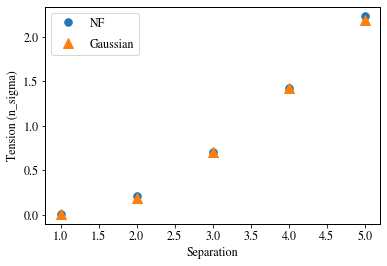

In [32]:
# 5 dimensions:

gauss_tension1=0.010445415765481133
gauss_tension2=0.19189217763668895
gauss_tension3=0.7027879605135345
gauss_tension4=1.4199064631172054
gauss_tension5=2.1818635701172577
                        
nf_tension1=0.01629380472485912                           
nf_tension2=0.21555667090945932                            
nf_tension3=0.7037773703658002                           
nf_tension4=1.4210146517689244                           
nf_tension5=2.226211769317175

shifts=[1,2,3,4,5]

# plt.plot(shifts[1:],results_nf,label='NF')
# plt.plot(shifts[1:],results_gauss,label='Gaussian')

plt.plot(shifts,[nf_tension1,nf_tension2,nf_tension3,nf_tension4,nf_tension5],label='NF',linewidth=0,marker='.',markersize=15)
plt.plot(shifts,[gauss_tension1,gauss_tension2,gauss_tension3,gauss_tension4,gauss_tension5],label='Gaussian',linewidth=0,marker='^',markersize=10)
plt.xlabel('Separation')
plt.ylabel('Tension (n_sigma)')
plt.legend()
plt.savefig('d5_axial_shift.pdf')
#plt.title('D=5')

In [14]:
#planar shifts
chain_arr = []
points = np.random.multivariate_normal(np.zeros(5),np.diag(np.ones(5)),n_points)
chain_arr.append(getdist.mcsamples.MCSamples(samples=points,names=['A','B','C','D','E'], labels=['A','B','C','D','E']))
n_shifts = 5
shifts = np.random.multivariate_normal([0,0],np.diag([1,1]),n_shifts)

for shift in shifts:
    mean = np.zeros(n_dim)
    mean[0:2] = shift
    points = np.random.multivariate_normal(mean,np.diag(np.ones(5)),n_points)
    chain = getdist.mcsamples.MCSamples(samples=points,names=['A','B','C','D','E'], labels=['A','B','C','D','E'])
    chain_arr.append(chain)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


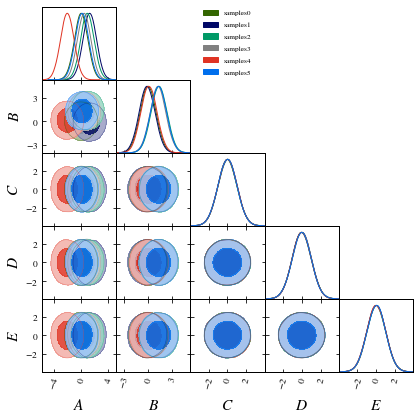

In [34]:
# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 'medium'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'pdf'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['legend.fontsize'] = 12

analysissettings3={
  'smooth_scale_1D':0.3,
  'smooth_scale_2D':0.3,
  'ignore_rows': u'0.0',
  'range_confidence' : u'0.005'
}

g = plots.get_subplot_plotter()
#GET DIST PLOT SETUP
g = plots.get_subplot_plotter(analysis_settings=analysissettings3,width_inch=6,rc_sizes=True)
g.legend_fontsize=12
g.settings.axis_tick_x_rotation=75
g.settings.lw_contour = 1.2
g.settings.legend_rect_border = False
g.settings.figure_legend_frame = False
g.settings.axes_fontsize = 14.0
g.settings.legend_fontsize = 12
g.settings.alpha_filled_add = 0.85
g.settings.lab_fontsize=20
g.legend_labels=False
g.triangle_plot(chain_arr,
               filled=True,
               contour_ls='solid', 
               contour_lws=1)
g.export('planar_shifts.pdf')

In [16]:
#NF
results_nf=[]
fid_chain = chain_arr[0]
for i,chain in enumerate(chain_arr):
    if i==0:
        continue
    chains = diff.chain()
    chains.chains = [fid_chain,chain]     
    chains.diff(feedback=False) # compute the difference chain
    maf = flow.MAF(n_dim)
    maf.setup(feedback=False)
    maf.train(chains.diff_chain,batch_size=1024,feedback=False)
    nsigma,high,low = tension.flow_significance(
                        maf.target_dist,
                        maf.gauss_bijector,
                        n_dim
                        )
    results_nf.append(nsigma)
    print(nsigma)

[####################] Completed!                             
0.03384594262165119
[####################] Completed!                             
0.08469986914787067
[####################] Completed!                             
0.037608287661255936
[####################] Completed!                             
0.21555667090945932
[####################] Completed!                             
0.03886251835440036


In [24]:
#GAUSSIAN
results_gauss5=[]
fid_chain = chain_arr[0]

fid_a = fid_chain.getParams().A
fid_b = fid_chain.getParams().B
fid_c = fid_chain.getParams().C
fid_d = fid_chain.getParams().D
fid_e = fid_chain.getParams().E
fid_means  = np.mean([fid_a,fid_b,fid_c,fid_d,fid_e],axis=1)
names = ['A','B','C','D','E']
fid_cov  = fid_chain.cov(names)

for i,chain in enumerate(chain_arr):
    if i==0:
        continue
    a = chain.getParams().A
    b = chain.getParams().B
    c = chain.getParams().C
    d = chain.getParams().D
    e = chain.getParams().E
    means = np.mean([a,b,c,d,e],axis=1)
    cov = chain.cov(names)
    chi2 = (means-fid_means) @ np.linalg.inv(cov + fid_cov) @ (means-fid_means)
    pte = scipy.stats.chi2.cdf(chi2, 5)
    t = np.sqrt(2)*scipy.special.erfinv(pte)
    results_gauss5.append(t)
    print('5D Gaussian Tension = {}'.format(t))
    

5D Gaussian Tension = 0.02990665799606449
5D Gaussian Tension = 0.08778246610488327
5D Gaussian Tension = 0.03443120658492159
5D Gaussian Tension = 0.21203573377910523
5D Gaussian Tension = 0.03321145956138521


In [18]:
#GAUSSIAN
results_gauss2=[]
fid_chain = chain_arr[0]

fid_a = fid_chain.getParams().A
fid_b = fid_chain.getParams().B
fid_means  = np.mean([fid_a,fid_b],axis=1)
names = ['A','B']
fid_cov  = fid_chain.cov(names)

for i,chain in enumerate(chain_arr):
    if i==0:
        continue
    a = chain.getParams().A
    b = chain.getParams().B
    means = np.mean([a,b],axis=1)
    cov = chain.cov(names)
    chi2 = (means-fid_means) @ np.linalg.inv(cov + fid_cov) @ (means-fid_means)
    pte = scipy.stats.chi2.cdf(chi2, 2)
    t = np.sqrt(2)*scipy.special.erfinv(pte)
    results_gauss2.append(t)
    print('2D Gaussian Tension = {}'.format(t))

2D Gaussian Tension = 0.4320413833368652
2D Gaussian Tension = 0.6588286616685358
2D Gaussian Tension = 0.4563739610621074
2D Gaussian Tension = 0.9419991653504034
2D Gaussian Tension = 0.45004552197117004


In [19]:
print([np.sqrt(np.sum(s**2)) for s in shifts])

[1.287820463700949, 1.6546185399632407, 1.3164311053827409, 2.044713989230983, 1.3106036887450139]


In [20]:
for i,r in enumerate(results_nf):
    print('NF: {:.3f} | 5D Gauss: {:.3f} | 2D Gauss: {:.3f}'.format(r,results_gauss5[i],results_gauss2[i]))

NF: 0.034 | 5D Gauss: 0.030 | 2D Gauss: 0.432
NF: 0.085 | 5D Gauss: 0.088 | 2D Gauss: 0.659
NF: 0.038 | 5D Gauss: 0.034 | 2D Gauss: 0.456
NF: 0.216 | 5D Gauss: 0.212 | 2D Gauss: 0.942
NF: 0.039 | 5D Gauss: 0.033 | 2D Gauss: 0.450


[0 1 2 3 4]
[1.0, 2.0, 3.0, 4.0, 5.0]


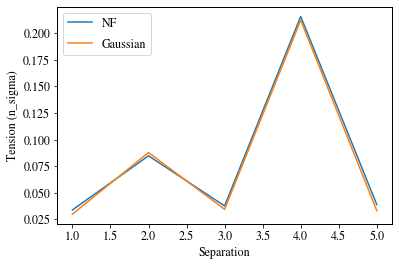

In [46]:
# 5 dimensions:
idxs = np.argsort([np.sqrt(np.sum(s**2)) for s in shifts])
print(idxs)
plt.plot(np.array([np.sqrt(np.sum(s**2)) for s in shifts])[idxs],np.array(results_nf)[idxs],label='NF')
plt.plot(np.array([np.sqrt(np.sum(s**2)) for s in shifts])[idxs],np.array(results_gauss5)[idxs],label='Gaussian')
plt.xlabel('Separation')
plt.ylabel('Tension (n_sigma)')
plt.legend()
plt.savefig('planar_nsigma.pdf')
#plt.title('D=5')

[0 1 2 3 4]


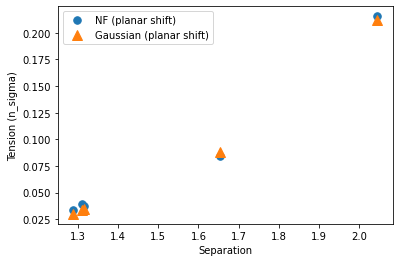

In [15]:
##### DATA FOR PLOT #####    
# NF
nf_planar = [
0.03384594262165119,                            
0.08469986914787067,                           
0.037608287661255936,                            
0.21555667090945932,                            
0.03886251835440036,
]

# GAUSS
gaussian_planar = [
0.02990665799606449,
0.08778246610488327,
0.03443120658492159,
0.21203573377910523,
0.03321145956138521,
]

shifts_planar = [1.287820463700949, 1.6546185399632407, 1.3164311053827409, 2.044713989230983, 1.3106036887450139]
##########################

# 5 dimensions:
idxs = np.argsort([np.sqrt(np.sum(s**2)) for s in shifts])
print(idxs)
plt.plot(shifts_planar,nf_planar,label='NF (planar shift)',linewidth=0,marker='.',markersize=15)
plt.plot(shifts_planar,gaussian_planar,label='Gaussian (planar shift)',linewidth=0,marker='^',markersize=10)
plt.xlabel('Separation')
plt.ylabel('Tension (N_sigma)')
plt.legend()
plt.savefig('planar_nsigma.pdf')
#plt.title('D=5')

In [9]:
#### PLOT DATA D=2 ####
gaussian_tension_1 = 0.2796056245502778
gaussian_tension_2 = 0.9039288278556087
gaussian_tension_3 = 1.609824871899598
gaussian_tension_4 = 2.360836257104938
gaussian_tension_5 = 3.097466662362832
                             
nf_1 = 0.2802965466700351                             
nf_2 = 0.9018978922947325                             
nf_3 = 1.6286791804495582                             
nf_4 = 2.3712658982688573                             
nf_5 = 3.11791467684613

results_gauss_2d = [gaussian_tension_1,gaussian_tension_2,gaussian_tension_3,gaussian_tension_4,gaussian_tension_5]
results_nf_2d = [nf_1,nf_2,nf_3,nf_4,nf_5]

shifts_2d=[1,2,3,4,5]

gauss_tension1=0.010445415765481133
gauss_tension2=0.19189217763668895
gauss_tension3=0.7027879605135345
gauss_tension4=1.4199064631172054
gauss_tension5=2.1818635701172577
                        
nf_tension1=0.01629380472485912                           
nf_tension2=0.21555667090945932                            
nf_tension3=0.7037773703658002                           
nf_tension4=1.4210146517689244                           
nf_tension5=2.226211769317175

shifts=[1,2,3,4,5]

results_gauss_5d = [nf_tension1,nf_tension2,nf_tension3,nf_tension4,nf_tension5]
results_nf_5d = [gauss_tension1,gauss_tension2,gauss_tension3,gauss_tension4,gauss_tension5]

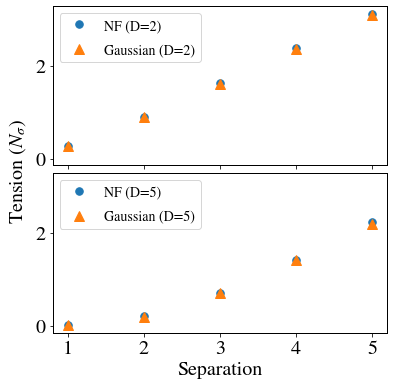

In [27]:
fig,ax = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, squeeze=True, figsize=(6,6))

# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 'medium'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'pdf'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['legend.fontsize'] = 14

#plt.ylabel()
fig.text(0.02, 0.5, r'Tension ($N_\sigma$)', va='center', rotation='vertical')


# 2 dimensions:
ax[0].plot(shifts_2d,results_nf_2d,label='NF (D=2)',linewidth=0,marker='.',markersize=15)
ax[0].plot(shifts_2d,results_gauss_2d,label='Gaussian (D=2)',linewidth=0,marker='^',markersize=10)
#ax[0].xlabel('Separation')
#ax[0].set_ylabel(r'Tension ($N_\sigma$)')
ax[0].legend()
#plt.savefig('tension_2d.pdf')
#plt.title('D=2')



# 5 dimensions:
ax[1].plot(shifts,results_gauss_5d,label='NF (D=5)',linewidth=0,marker='.',markersize=15)
ax[1].plot(shifts,results_nf_5d,label='Gaussian (D=5)',linewidth=0,marker='^',markersize=10)
ax[1].set_xlabel('Separation')
ax[1].legend()
#plt.savefig('d5_axial_shift.pdf')
#plt.title('D=5')

plt.subplots_adjust(hspace=.05,wspace=.1)
plt.savefig('nsigma_v_separation_gaussian.pdf')

In [ ]:
# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 'medium'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'pdf'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['legend.fontsize'] = 14

analysissettings3={
  'smooth_scale_1D':0.3,
  'smooth_scale_2D':0.3,
  'ignore_rows': u'0.0',
  'range_confidence' : u'0.005'
}

g = plots.get_subplot_plotter()
#GET DIST PLOT SETUP
g = plots.get_subplot_plotter(analysis_settings=analysissettings3,width_inch=6,rc_sizes=True)
g.legend_fontsize=12
g.settings.axis_tick_x_rotation=75
g.settings.lw_contour = 1.2
g.settings.legend_rect_border = False
g.settings.figure_legend_frame = False
g.settings.axes_fontsize = 14.0
g.settings.legend_fontsize = 12
g.settings.alpha_filled_add = 0.85
g.settings.lab_fontsize=20
g.legend_labels=False
g.triangle_plot(chain_arr,
               filled=True,
               contour_ls='solid', 
               contour_lws=1,
               labels=['0'])
g.export('2d_gaussian_test.pdf')